# Promoter two-state (telegraph) mean-field model

### $$\dot{a} = k_{on}(u)(1 - a) - k_{off}a$$
### $$\dot{m} = k_{tx}a - (\gamma_m+\mu)m$$
### $$\dot{p} =  k_{tl}m - (\gamma_p + \mu)p$$

#### $\text{with } a(t)∈[0,1] \text{the ON fraction and }u(t)\text{ an external input.}$
#### Hyperparameters
##### $k_{tx} [mRNA · time^{−1}]$ — transcription rate.
##### $k_{tl} [(protein).mRNA · time^{−1}]$ - translation rate.
##### $γm[time−1]$ — mRNA decay rate
##### $γp[time−1]$ — protein decay rate
##### $μ [time−1]$ — growth/dilution rate (set 0 for non-growing cells or include to see how growth throttles levels)

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import mplhelv

In [4]:
L1 = 200
K = 50
n = 2
kon_max = 2
kon_basal = 0.1
koff = 1
ktx = 5
ktl = 60
gammam = 1.386
gammap = 0.139
mu = 0.03
a0 = 0
m0 = 0
p0 = 0
time = (0, 24)

In [13]:
def UFunc(t, t0=0.0, L0=0.0, L1=L1):
    ta = np.asarray(t)
    out = np.where(ta < t0, L0, L1)
    return float(out) if np.isscalar(t) else out
    
def KonFunc(u, K = K, kon_basal=kon_basal, kon_max=kon_max, n=2):
    return kon_max*(u**n)/(u**n + K**n) + kon_basal

def genex(t, amp, params):
    koff, ktx, gammam, mu, ktl, gammap, UFunc, KonFunc, n = params
    a, m, p = amp
    u = UFunc(t)
    kon = KonFunc(u, n=n)
    adot = kon*(1 - a) - koff*a
    mdot = ktx*a - (gammam + mu)*m
    pdot = ktl*m - (gammap + mu)*p
    return [adot, mdot, pdot]

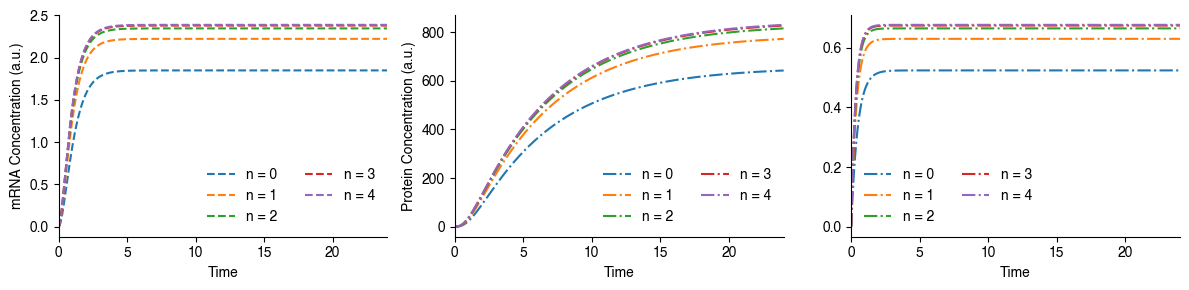

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for n in range(5):
    params = (koff, ktx, gammam, mu, ktl, gammap, UFunc, KonFunc, n)

    sol = solve_ivp(genex, time, [a0, m0, p0], args=(params,),
                method='RK45', dense_output=True,
                rtol=1e-6, atol=1e-9, max_step=np.inf)
    t = np.linspace(*time, 4000)
    adot, mdot, pdot = sol.sol(t)
    axs[0].plot(t, mdot, ls='--', label=f'n = {n}')
    axs[1].plot(t, pdot, ls='-.', label=f'n = {n}')
    axs[2].plot(t, adot, ls='-.', label=f'n = {n}')
    # p_ss = p_star(K, n)
    # m_ss = (gammap+mu)/ktl * p_ss
    # axs[0].axhline(m_ss, ls='--', lw=1, alpha=0.3)
    # axs[1].axhline(p_ss, ls='--', lw=1, alpha=0.3)
    axs[0].set_ylabel("mRNA Concentration (a.u.)")
    axs[1].set_ylabel("Protein Concentration (a.u.)")
    axs[2].set_ylabel("mRNA Concentration (a.u.)")
    axs[0].set_xlim(*time)
    axs[1].set_xlim(*time)
    axs[2].set_xlim(*time)
for ax in axs.flatten():
    ax.set_xlabel("Time")
    ax.spines[["top", "right"]].set_visible(False)
    ax.legend(frameon=False, ncol=2)
fig.tight_layout()